In [1]:
# import libraries to Script 
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_recipe(url):

    dict_ = {}
    
    ingredients = ''
    ingredients_list = []
    
    directions = ''
    directions_list = []
    
    imgs = ''
   
    
    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')
    
    dict_['Name'] = url.split('/')[-2].replace('-',' ')

    try:
        ingredient = soup.find_all(class_="checkList__line")
        
        for ing in ingredient:
            
            ingredients += ing.get_text().strip() + ' , '
            ingredients_list.append(ing.get_text().strip())
            
    except:
        pass
   
    try:
               
        directions_food = soup.find_all(class_="recipe-directions__list--item")
        
        for direction in directions_food:
            directions +=  direction.get_text().strip()+ ' , '
            directions_list.append(direction.get_text().strip())
            
    except:
        pass
    
    
    try:
        
        summary  = soup.find(class_="recipe-summary clearfix")

        dict_['Rating'] = summary.find('meta')['content']
        dict_['Review_count'] = summary.find(class_="review-count").get_text().split(' ')[0]
    except:
        pass
    
    try:
        time  = soup.find(class_ = 'prepTime').find_all('li')
        dict_['Prep_time'] = time[1]['aria-label'].split(':')[1]
        dict_['Cook_time'] = time[2]['aria-label'].split(':')[1]
    except:
        pass
    
    
    try:
        
        calorie = soup.find(class_="calorie-count")

        dict_['Calorie'] = calorie.get_text()
    except:
        pass
    
    
    try:
        img = soup.find(class_="photo-strip__items")
        for i in range(0,len(img.find_all('img'))):
            imgs += img.find_all('img')[i]['src'] + ' , '
            
        
    except:
        pass

    
    try:
        ingredient = soup.find_all(class_="ingredients-item-name")
        
        for ing in ingredient:
            
            ingredients += ing.get_text().replace('\n','').strip() + ' , '
            ingredients_list.append(ing.get_text().replace('\n','').strip())
            
    except:
        pass

    
    try:
        
        directions_food = soup.find_all(class_="section-body")
        
        for direction in directions_food:
            directions +=  direction.get_text().replace('\n','').strip()+ ' , '
            directions_list.append(direction.get_text().replace('\n','').strip())

    except:
        pass
    
    
    try:
        
        summary = soup.find( class_="recipe-review-container")

        dict_['Review_count'] = summary.find(class_="rating-count").get_text().replace('\n','').strip()
        dict_['Rating'] = summary.find(class_="review-star-text").get_text().replace('\n','').strip().split(' ')[1]
    except:
        pass
    
    
    try:
        time = soup.find_all(class_ = 'recipe-meta-item-body')
        dict_['Prep_time'] = time[0].get_text().replace('\n','').strip()
        dict_['Cook_time'] = time[1].get_text().replace('\n','').strip()
    except:
        pass
    
    try:
        calorie = soup.find(class_="calorie-count")

        dict_['Calorie'] = calorie.get_text()
    except:
        pass
    
    try:
        calorie = soup.find( class_="partial recipe-nutrition-section")
        dict_['Calorie'] = calorie.find(class_="section-body").get_text().strip().split(';')[0]
    except:
        pass
   
    try:
        calorie = soup.find( class_="nutrition-summary-facts")
        dict_['Calorie'] = calorie.get_text().split(';')[0].split('\n')[-1]
    except:
        pass
   
    try:
        
#         img = soup.find( class_="component image-filmstrip")

#         dict_['img_url'] = img.find(class_="ugc-photos-link").find('div')['data-src']
        img = soup.find(class_="component image-filmstrip")
        for i in range(0,len(img.find_all(class_="ugc-photos-link"))):
            imgs += img.find_all(class_="ugc-photos-link")[i].find('div')['data-src']+ ' , '
    except:
        pass
        

    dict_['Directions'] = directions 
    dict_['Directions_list'] = directions_list
    dict_['img_urls'] = imgs
    dict_['Ingredients'] = ingredients
    dict_['Ingredients_list'] = ingredients_list

#     list_of_food.append(dict_)
    return dict_
    

In [3]:
# url_dinner = 'https://www.allrecipes.com/recipes/17562/dinner/?page=65'  #65 pages dinner
# url_dessert = 'https://www.allrecipes.com/recipes/79/desserts/?page=776' 
# url_breakfast = 'https://www.allrecipes.com/recipes/78/breakfast-and-brunch/?page=190'
# url_lunch = 'https://www.allrecipes.com/recipes/17561/lunch/?page=63'
urls = []
url_dinner = [urls.append(f'https://www.allrecipes.com/recipes/17562/dinner/?page={i}') for i in range(1,66)]
url_dinner = [f'https://www.allrecipes.com/recipes/17562/dinner/?page={i}' for i in range(1,66)]

url_dessert = [urls.append(f'https://www.allrecipes.com/recipes/79/desserts/?page={i}') for i in range(1,777)]
url_dessert = [f'https://www.allrecipes.com/recipes/79/desserts/?page={i}' for i in range(1,777)]

url_breakfast = [urls.append(f'https://www.allrecipes.com/recipes/78/breakfast-and-brunch/?page={i}') for i in range(1,191)]
url_breakfast = [f'https://www.allrecipes.com/recipes/78/breakfast-and-brunch/?page={i}' for i in range(1,191)]

url_lunch =[urls.append(f'https://www.allrecipes.com/recipes/17561/lunch/?page={i}') for i in range(1,64)]
url_lunch =[f'https://www.allrecipes.com/recipes/17561/lunch/?page={i}' for i in range(1,64)]




In [22]:
urls_all = []
urls_dinner = []
urls_breakfast = []
urls_lunch = []
urls_dessert = []

for url in url_breakfast:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')   
    url_ = soup.find_all(class_="fixed-recipe-card")

    for m in url_:
        urls_breakfast.append(m.a['href'])
        urls_all.append(m.a['href'])
        
for url in url_lunch:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')   
    url_ = soup.find_all(class_="fixed-recipe-card")

    for m in url_:
        urls_lunch.append(m.a['href'])
        urls_all.append(m.a['href'])


for url in url_dinner:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')   
    url_ = soup.find_all(class_="fixed-recipe-card")

    for m in url_:
        urls_dinner.append(m.a['href'])
        urls_all.append(m.a['href'])
        
for url in url_dessert:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')   
    url_ = soup.find_all(class_="fixed-recipe-card")

    for m in url_:
        urls_dessert.append(m.a['href'])
        urls_all.append(m.a['href'])
    

dinner = pd.DataFrame(urls_dinner)
dinner.to_csv('dinner_urls.csv', index = False)

breakfast = pd.DataFrame(urls_breakfast)
breakfast.to_csv('breakfast_urls.csv', index = False)

lunch = pd.DataFrame(urls_lunch)
lunch.to_csv('lunch_urls.csv', index = False)

dessert = pd.DataFrame(urls_dessert)
dessert.to_csv('dessert_urls.csv', index = False)


        

In [12]:
all_urls = pd.DataFrame(urls_all)
all_urls.columns = ['urls']
all_urls.to_csv('all_urls.csv', index = False)

In [3]:
all_urls = pd.read_csv('all_urls.csv')

In [4]:
len(all_urls)

21810

In [7]:
df_breakfast = pd.read_csv('breakfast_urls.csv')
df_lunch = pd.read_csv('lunch_urls.csv')
df_dinner = pd.read_csv('dinner_urls.csv')
df_dessert = pd.read_csv('dessert_urls.csv')
df_all = pd.read_csv('all_urls.csv')
len(df_breakfast),len(df_lunch), len(df_dinner), len(df_dessert), len(df_all)



(3790, 1257, 1302, 15461, 21810)

In [2]:
df_urls = pd.read_csv('all_urls.csv')
print(len(df_urls))

list_of_food = []
for ind , url in enumerate(df_urls.urls):
    try: 
        
        list_of_food.append(get_recipe(url))
#         print(ind)
    except:
        pass
df = pd.DataFrame(list_of_food)

df = df[['Name', 'Ingredients', 'Directions', 'Prep_time', 'Cook_time', 'Calorie', 'Rating' , 'Review_count', 'img_urls', 'Ingredients_list', 'Directions_list' ]]


df.head()


In [12]:
df['Meal_Type'] = ['breakfast' if i <3790 else 'lunch' if i >= 3790 and i<5047 else 'dinner' if i>=5047 and i <6349 else 'dessert' for i in range(0,21810)]

In [13]:
df.Meal_Type.value_counts()

In [14]:
df.isna().sum()

Name                   0
Ingredients            0
Directions             0
Prep_time           3483
Cook_time           6218
Calorie              136
Rating                 2
Review_count           2
img_urls               0
Ingredients_list       0
Directions_list        0
Meal_Type              0
dtype: int64

In [16]:
df.Ingredients = [i.replace('Add all ingredients to list ,', '') for i in df.Ingredients] 
df.drop_duplicates(subset='Ingredients', inplace=True)
df.to_csv('Ingredient_lists_last.csv', index = False)

In [17]:
len(df)

19904

In [18]:
df.isna().sum()

Name                   0
Ingredients            0
Directions             0
Prep_time           3248
Cook_time           5728
Calorie              129
Rating                 2
Review_count           2
img_urls               0
Ingredients_list       0
Directions_list        0
Meal_Type              0
dtype: int64

In [21]:
import re 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation 

# # Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words.update(['small', 'cane','berely','direct', 'tube','baker','brand','devil','king','wet','kiss', 'crystallize','semi','bar','slider','blood','tightly','hard','breakfast', 'age','farmer','towel', 'fillings','thick','container','teaspoons','tablespoons','double','fluid','dinner','cold','split','roast', 'roasting', 'roasted','end','green','warm','skin','button','short','wash','tear','deep', 'dish','minute', 'wild','bag', 'hair' ,'self', 'old' , 'blue','separate','-less', 'section', 'eighth','hour','organic','best', 'center','pure' , 'blanch','quality', 'high','import', 'fire', 'recipe', 'non', 'horizontally', 'softened', 'eat', 'drop', 'color', 'food', 'new', 'free', 'pre', 'kitchen(<sup>&reg;</sup', 'wide', '-pound',"chachere's(<sup>&reg;</sup",'sup>&reg;</sup',
    'o*tel(<sup>&reg;</sup', 'room', 'smoked', 'unbake', 'blend(<sup>&reg;</sup' , 'box', 'dry', 'smoke', 
    'cut','wood','fourth','press','organic','hour','-spice', 'secret', 'basic', 'divided','aged', 'mini', 'key', 'cup', 'tablespoon', 'melted', 'half', 'tablespoon', 'teaspoon', 'ounce', 'square', 'pack', 'extract', 'flavor', 'drink',
    'mix', 'bell', 'light','black','foods' ,'white', 'brown', 'large', 'cups', 'shredded', 'seasoning' , 'squeeze', 'package', '½',
    'e.g.', 'slice', 'taste', 'pound', 'freshly', 'kosher', 'freeze', '⅔', 'plus', 'pan', 'dice', 'taste', 'thinly', 'slice', 'red'
    'tang', '¼', 'favorite', 'extra', 'remove',  '¾', 'uncooked', 'plain', 'head', 'sun', 'raw', 'attach', 'quick',
    '⅛', 'round', 'thin', '⅓', 'thickness', 'melt', 'baby', 'size', 'country', 'de', 'link', 'elbow', 'ready', 'soft',
    '®', 'prepare', 'piece', 'sized', 'reduce', 'inch', 'packet', 'need', 'crush', 'crushed', 'soften', 'ounces',  
    '-inch', '-x', 'z', 'low', 'game', '™', 'swan(<sup>&reg;</sup', '©', 'day', 'real', 'grands(<sup>&reg;</sup', 'mixed' 
    'single','o', 'liquid', 'divide', 'roll', 'fresh', 'cube',  'bake', 'medium', 'cook', 'purpose', 'heavy', 'bottle', 'style', 'season', 'cooking',
    'pitted','decorative','lorna','amaz!n','passover','disposable','filter','mcvitie','cadbury','lava','tootsie','doone','cle','sicilia',
     'culture','remekin','joy','colour','cascadian','hurbard','post','lindt','fiori','devils','cardboard','pareve','treat','glass','coke',
     'saco','distilled','agular','demi','walla','chilean','excess','edge','barely','fiesta','butcher','boston','ed','eal','picnic','eady',
     'saute','basket','napa','baste','heirloom','oriental','bunches','unripe','harvest','edward','gimme','score','cluster','peeler','polish',
     'cuisine','easy','pace','orgain','samuel','starlight','trail','sanding','jose','cuervo','boxed','infuse','sub','wondra','isolate',
     'standard','tin','combination','cava','jarlsberg','pride','prebake','nordica','al','boboli','knorr','vermont','unfold','crowns','item'
     ,'chardonnay','california','tex','mex','edam','maggi','bragg','sue','accent','belgioioso','rumford','vega','hood','stack','tough',
     'bonnet','hometown','contadina','bermuda','charcoal','beecher','flagship','barrel','bologna','truroots','safe','emulsion','wholesome',
     'lorann','barlean','banquet','shreds','cotton','giant','cap’n','marie','hatch','morningstar','grits','herman','strength','pale','confetti','european','ener','lace','bibb','becel','guittard',
     'chipit','bailey','stencil','milano','thins','chambord','blade','rectangular','cooled','wear','big','fatty','poach','poached','mexico','granulated','fage','thawed','believe','piping','sargento',
     'kitchens','tot','ruth','supermoist','family','rectangle','block','cicle','bowl','scant','maxwell','louisiana','acini','kentucky','grated','sieve','glove','retain','culinary','brussels','carcass',
     'bruise','navy','edy','fed','pot','middle','strand','dreyer','direction','bruce','oval','feed','belgian','morton','greasing','edhot','krusteaz','nature','hellman','boursin','combine','cholula','borden','martha',
     'coin','ore','follow','precook','sleeve','hi','veget','dressing','devil','bot','wrappers','boiled','whipping','froz','choppe','deviled','firm','kal','ripe','tables','chip','vegetable','juice','devil','unsalted', 'pastry','inches','crust','gelatin','8X12','alum','envelopes','hot','unflavored','reynolds','dtype','object','tables','juiced','evapor','div','bu', 'cored','sug','sheets','flav', 'unsw','graham','silk','devil','pods','tab','suga','br','gro','bak','fl','whi','needed','coating','maple','boneless','bone','teaspo', 'fat','ha', 'ch','lean','oni','cans','lea','rub','oun','di','cornish','condensed','ziti','silken','mashed','pr','bis','gluten','min','flo','tig','nonstick','grou','strips','baki','nanstick','cubes','packages','tablespo','musta','scoop','mil','tast','te','baki','diagonally','swiss','cu','sa','wa','dou','su','pin','canned','chopped','whol','pou','chilled','ground','minced','mea','vi','pa','ga','chuck','pounds','flak','lett','mild','flaked','finely','trimmed','pep','pu','provence','healthy','cooked','heated','hawaiian','drained','home','hollandaise','holiday','hines','hint','himalayan','hillsire','hidden','herbe','herb','made','hunt','hungry','hungarian','hull','hulled','hydrogenated','girl','greens','greek','grey','husk','instruction','individual','indian','icing','iced','intact','ingredients','spiral','spear','spanish','supplement','superfine','summer','suggestions','uncured','texture','unbaked','triangular','tiger','thousand','triangle','tradisional','touch','toasted','vegetarian','undrained','unfiltered','vegan','virgin','williamsburg','zero', 'youn','york','winter','wish','yellow','swedish','turkish','total','texas','tennessee','aside','bakeware','aunt','baked','bakers','bakery','baking','accord','argo','arthur','aid','amish','animal','mill','lite','leave','label','liner','like','length','life','marble','magic','lunch','log','liter','marinate','marinated','miils','metal','melts','measure','market','milliliter','moon','month','miss','necessary',"o'brien",'northern','parker','pasteurized','pasteurize','paste','pod','pocket','pick','peter','pet','perfectly','peak','prepared','premier','preference','prefereably','possible','product','proof','processor','preserves','pressurize','prime','edible','purple','pureed','puree','purchase','pull','rapid','quaker','quark','quartered','quarts','quartered','refrigerator','refrigerated','refrigerate','refined','reduced','segments','seed','rest','request','replacer','replacement','removable','regular','seedless','seeded','school','sand','skippy','sister','shop','shoot','shells','shave','shaped','shake','seven','set','skillet','skinned','skirt','sproud','slices','sprigs','sprig','southwestern','southern','sons','snap','southwest','spreadable','sport','spectrum','state','strongly','strong','store','sticky','sticks','stick','steel','island','islands','iron','irish','international','suitable','layers','korean','japanese','jamaican','italian','israeli','lucky','seafood','red','pepe','park','mct','sweet','semisweet', 'se','valley','sweetener','sweetened','uncooke','tall','tablet','table','type','twice','unfrosted','unseasone','unsweetened','unsweetene','unsliced','unsifte','unsifted','unsweetene','untreated','sweetener','sweetened','sweeten','super','la','white','brown','gay','thoroughly','farms','duty','end','eighth','smart','factory','mary','meyer','start','rolled','rotini','silver','sec','rock','sprinkling','spring','ocean','bok','dream','masa','basic','overripe','foods','direct','crunch','envelop','thread','tiny','worm','bit','bites','bits','fun','machine','overnight','rack','clear','count','breakstone','cap','include','includes','drops','great','multi','essential','supreme','smoked','cubed','favorite','heat','wild','spam','kitchen','discard','heath','essentials','spoonable','special','segment','iceberg','microwave','earth','thickly','dripping','unwrapped','thickness','dress','tip','stone','horizontally','imitation','new','ball','balance','land','good','snow','star','button','press','minute','premium','elbow','farm','chunky','crystal','country','multicolore','dessert','high','short','gram','envelope','flavoring','sized','smooth','carton','toll','tube','gold','gallon','karnel','ready','boil','fully','pan','house','ladyfinger','delicious','decorate','crunchy','beverage','devil','eagle','base','solid','process','calorie','skin','angel','fill','bulk','soft','nestle','pink','blue','squeeze','flat','stock','sheet','brand','dairy','softened','individually','substitute','link','slightly','concentrate','dish','serve','hard','extract','soup','layer','bottle','wrap','unwrap','round','liquid','breakfast','protein','fashioned','packet','spread','smoke','head','sharp','sliced','natural','lengthwise','lightly','active','bunch','stalk','cover','mini','preserve','meal','remove','smith','skim','blend','thin','cover','quarter','self','double','golden','desire','skinless','extra','warm','thick','medium','cool','quart','juised','crush','shell','sea','thinly','cooking','free','quick','chunk','shortening','boiling','cracker','filling','sift','confectioner','dry','divide','water','fresh','soften','optional','slice','food','soften','frozen','ice','freshly','bell','room','shorten','spray','cold','half','container','temperature','instant', 'piece','heavy','cook','freeze','melt','melted','drain','shred','large','thaw','brown','inch','large', '⅛', '⅔', '⅓', '™', 'à', '¾', '½', '¼', '®','o','wide','ml','ro*tel','pre','paso(<sup>&reg;</sup','old','need','n','msg','ice(<sup>&reg;</sup','lady','velveeta(<sup>&reg;</sup','sriracha(<sup>&reg;</sup','sriracha(<sup>&reg;</sup', 'pound','plastic','pkg','uncle','towel','sup>&reg;</sup','slow', 'size','simple', 'simply','second','secret','seasoned','seasonal','seasoning','seasons','unbleached','unbleache',"frank's(<sup>&reg;</sup",'edhot(<sup>&reg;</sup','cup4cup','cut','center',"campbell's(<sup>&reg;</sup",'buy','and/or','bag','bar','bars','beauty',"ac'cent",'vidalia(<sup>&reg;</sup','1','dr.','8','le','mrs.','msg','f','12','etc','ups','f1','tm',"o'lakes(<sup>&reg;</sup",'brown(<sup>&reg;</sup','lb',"s'more",'mold(s',"o'lakes",'adult','spoon', 'kid',"hellmann's(<sup>&reg;</sup",'eg', 'bay(<sup>&reg;</sup','seasoning(<sup>&reg;</sup','express(<sup>&reg;</sup',"ben's(<sup>&reg;</sup",'foods(<sup>&reg;</sup','b','classico','marnier(<sup>&reg;</sup',"ac'cent",'salt(<sup>&reg;</sup','partially','key','c','shape','additional','classic','dinner','oz','long','use','g','m&m','day','diced','aluminum','kosher','season','hershey', 'deep','non', 'de', 'box', 'ounces','e.g.','drink','real', 'deli', 'organic','prepered','z','break','blanch','reserve','original', 'plus', 'single','baby','reduce','mixed','cup','pack','drop','color','dice', 'cube', 'roll','small', 'prepare', 'square', 'ingredient', 'add', 'list', 'teaspoon','teaspoons', 'tablespoon','tablespoons', 'ounce',
     'purpose', 'package','cups','taste', 'mix','anaheim','construction','extender','boom','foot','annie','disc','open','cara','springform','durkee','young','ecolier','paleo','filing','abuelita','saskatoon','stuf','infant','mills','foamy','grams','lyle','brach','fruity','ultragrain','teddy','robin','caramelize','famous','foam','caffeinated','sel','dissolve','blacken','twine','porter','essence','noor','otto','jerk','riceselect','steam','welch','breyer','oven','cultured','veggie','colors','jemima','madagascar','dye','delight','mason','tropical','curly','rustic','resealable','maille','bumble','ahead','nondairy','frankfurter','slab','verde','ida','crock','shuck','tray','starbucks','steakhouse','barilla','fresca','cutter','maria','morello','equivalent','tang','bacardi','evaporated','cajeta','dried','defrost','kool','general','pops','minis','sparkle','stiff','concord','lopez','nutter','membrane','dew','mountain','dredging','gochujang','unpeele','au','jus','debearde','variety','lid','yoplait','formula','burgundy','vital','vermouth','mayer','chevre','dragon','bee','dannon','broken','traditional','schubert','homemade','slit','glazed','gallo','bias','crispy','bella','friendship','jiffy','crisps','bleach','undiluted','cointreau','royal','caster','mold','andes','rod','maldon','diagonal','stir','sazon','equal','kaiser','club','oscar','craft','dietz','watson','snip','aleppo','hillshire','joe','pepperidge','case','containers','bass','finlandia','pantry','note','keebler','chewy','eyeball','halloween','curl','blackwell','brazil','churned','caesar','eye','brush','fresno','marzetti','brewer','easter','grade','mission','crosse','montreal','flakes','loosely','scotch','ripen','crackers','dipping','links','lactaid','fresco','brine','campbell','rolls','fluffy','enjoy','tots','crumbled','el','knox','parkay','stripe','pudde','shank','sparkling','planters','dickinson','compress','shoestring','nabisco','jones','confectioners','chex','string','smash','torani','blackstrap','shaving','idaho','idahoan','tri','libby','bing','twist','digestive','stiffly','forest','johnsonville','velveeta','knudsen','basmati','frank','puffed','julienne','bartlett','rainbow','jet','petite','vidalia','ritz','roti','rotisserie','bunche','drizzle','creole','eyed','browns','swirl','deluxe','sponge','wilton','beaters','demerara','smithfield','tie','preferably','smucker','stewed','trader','triple','hormel','kellogg','beaten','gala','canadian','footnote','unpopped','salted','pattila','whisk','stuff','scald','lakes','farmland','pyure','dole','machiko','pouch','bow','arborio','dean','guinness','wrapper','reese','complete','nutritional','dimond','starter','nilla','thai','frost','grill','karo','flaky','chilie','splash','mixture','rich','choice','scrape','creamer','grit','agar','artificial','yukon','miracle','glutinous','dutch','bark','mott','decorator','baileys','kisses','maid','stout','tidbit','wip','jinger','scrub','unpeeled','peel','morsels','casing','jumbo','parchment','clean','brick','chinese','reddi','wooden','rolling','saltine','mace','kraft','jimmy','soak','swerve','truvia','clarify','asian','whipped','crosswise','zest','unflavore','crocker','lukewarm','mccormick','provolone','crack','american','foil','colored','russet','caper','colby','crescent','kernel','duncan','grand','skewer','german','ring','breeze','floret','roma','coarse','philadelphia','crisp','english','roughly','degree','puff','wedge','devein','mexican','root','nonfat','splenda','stem','germ','glaze','sprinkle','trim','fillet','fine','firmly','dijon','jack','sandwich','granny','distil','brew','strip','worcestershire','coloring','dark','pint','fruit','dash','chile','dusting','decoration','crumb','pinch','peel','frosting','miniature','beat','grate','whip','unsalte','core',
     'evaporate'])

def spacy_tokenizer(text):
    # remove html tags from all of the text before processing
    cleanr = re.compile('<.*?> ')
    cleantext = re.sub(cleanr, ' ', text)
    cleanr = re.compile(r'([+-]?)\s*(?:(?:(?:[^.([{]?(\d+))|(\d+\.\d+(?!\w+)))(?!\w+|\.))(?![([{])')
    cleantext = re.sub(cleanr, ' ', cleantext)
    cleanr = re.compile(r'(\-)')
    cleantext = re.sub(cleanr, ' ', cleantext)
#     cleanr = re.compile(r'(\d+\:\d+)')
#     cleantext = re.sub(cleanr, ' ', cleantext)
    cleanr = re.compile(r'\s([a-zA-Z])\s')
    cleantext = re.sub(cleanr, ' ', cleantext)
#     cleanr = re.compile(r'\)')
#     cleantext = re.sub(cleanr, ' ', cleantext)

#     cleanr = re.compile(r'\(([^\)]+)\)')
#     cleantext = re.sub(cleanr, ' ', cleantext)
#     cleanr = re.compile(r'\b(\w\.)')
#     cleantext = re.sub(cleanr, ' ', cleantext)
    
    # Creating our token object, which is used to create documents with linguistic annotations.
    # we disabled the parser and ner parts of the pipeline in order to speed up parsing
    mytokens = nlp(cleantext, disable=['parser', 'ner'])

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # return preprocessed list of tokens 
    return mytokens


df_ing = {}
for ing in df.Ingredients:
    new_ = spacy_tokenizer(ing)
    for i in new_:
        if i in df_ing:
            df_ing[i] += 1

        else:
            df_ing[i] = 1
            
single_ing = []
for key, value in df_ing.items():
    if value ==1:
        single_ing.append(key)



stop_words.update(single_ing)


# spacy_tokenizer(df.Ingredients)

In [3]:
sorted_d = sorted(df_ing.items(), key=lambda x: x[1], reverse=True)
sorted_d

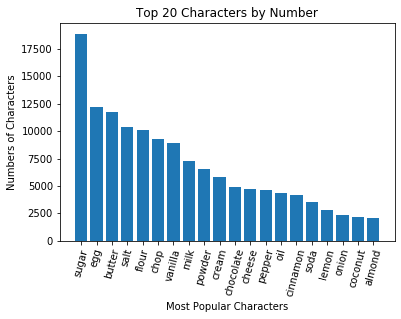

In [111]:
plt.bar(*zip(*sorted_d[:20]))
plt.xticks([i[0] for i in sorted_d[:20]], rotation = 75)
plt.xlabel('Most Popular Characters')
plt.ylabel('Numbers of Characters')
plt.title('Top 20 Characters by Number')
plt.show()

In [69]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, min_df=2, max_df=.7)


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Ingredients)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(19904, 1040)

In [25]:
import pickle
with open('tfidf_matrix.pickle', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

In [70]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.23930638, 0.2034185 , ..., 0.07563195, 0.06952439,
        0.16760077],
       [0.23930638, 1.        , 0.69473134, ..., 0.11931149, 0.05095883,
        0.26922704],
       [0.2034185 , 0.69473134, 1.        , ..., 0.1717376 , 0.07335041,
        0.26938378],
       ...,
       [0.07563195, 0.11931149, 0.1717376 , ..., 1.        , 0.04493998,
        0.21882281],
       [0.06952439, 0.05095883, 0.07335041, ..., 0.04493998, 1.        ,
        0.10340718],
       [0.16760077, 0.26922704, 0.26938378, ..., 0.21882281, 0.10340718,
        1.        ]])

In [71]:
import pickle
with open('cosine_sim.pickle', 'wb') as f:
    pickle.dump(cosine_sim, f)

In [4]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['Name'])
indices

In [28]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [29]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def Pics(img_urls):
    print(color.BOLD + df.Name.iloc[img_urls] + color.END)

    urls = [url for url in df.img_urls[img_urls].split(',')]
#         resim = []
    images = []
    for i in range(0, len(urls)-1):
        url = urls[i].strip() 

#         print(url)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))           
        images.append(img)

        if img.size[0] >125:

            plt.imshow(img)
            plt.figure()             

In [76]:
def Ingredients(ind):
    print(color.BOLD + df.Name.iloc[ind] + color.END)
    ing = {key+1 :i.strip() for key, i in enumerate(df.Ingredients[ind].split(','))}
    ingredient = {}
    for key, value in ing.items():
        if value:
            ingredient[key] = value
        
    return ingredient

In [129]:
def Directions(ind):
    print(color.BOLD + df.Name.iloc[ind] + color.END)
    direction = {key+1 :i.strip() for key, i in enumerate(df.Directions[ind].split('.'))}
    directionss = {}
    for key, value in direction.items():
        if value:
            directionss[key] = value
        
    return directionss

In [34]:
def Stats(ind):
    print(color.BOLD + df.Name.iloc[ind] + color.END)
    return df[['Prep_time','Cook_time','Calorie','Rating','Review_count']].iloc[ind]

In [36]:
def All_info(ind):
    print(color.RED + df.Name.iloc[ind] + color.END)
    print(color.BLUE + ' \n Stats \n' + color.END)
    print(Stats(ind) , '\n') 
    print(90*'*')
    print(color.BLUE +'\n Ingredients \n'+ color.END)
    print(Ingredients(ind), '\n')
    print(90*'*')
    print(color.BLUE +'\n Directions \n' + color.END)
    print(Directions(ind) , '\n')
    print(90*'*')
    print(color.BLUE +'\n Pics \n'+ color.END)
    Pics(ind)
    
    

In [136]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
#     print(movie_indices)
    
    # Return the top 10 most similar movies
    return   df.Name.iloc[movie_indices]

In [1]:
# list(df.Name)

In [156]:
get_recommendations('easy morning glory muffins')

13057                      baby carrot bars
7500              grandmas fresh apple cake
6288                sams famous carrot cake
9861                fresh apple walnut cake
12378                     apple dapple cake
7161                    romanian apple cake
9608               sister beths carrot cake
7394                    fresh apple cake ii
11014    apple walnut cake with lemon glaze
10260             german apple pudding cake
Name: Name, dtype: object

# functions
* for stats:
    call stats() function
* for Ingredients:
    call Ingredients() function
* for directions:
    call Directions() function
* for images:
    call Pics() function
* for all:
    call All_info() function

**use index to call a function

In [157]:
Ingredients(7500)

grandmas fresh apple cake


{1: '1 cup all-purpose flour',
 2: '1 teaspoon baking soda',
 3: '1 teaspoon ground cinnamon',
 4: '1/2 teaspoon salt',
 5: '1 cup white sugar',
 6: '1 egg',
 7: '1/4 cup vegetable oil',
 8: '2 cups peeled and chopped apple',
 9: '1/2 cup chopped walnuts',
 10: '1/2 cup raisins'}

In [158]:
Directions(7500)

grandmas fresh apple cake


{1: 'Preheat oven to 350 degrees F (175 degrees C)',
 2: 'Grease and flour a fluted tube pan (such as Bundt(R))',
 3: ', Sift flour, baking soda, cinnamon, and salt together in a bowl',
 4: 'Set aside',
 5: ', Mix sugar, egg, and oil together in another bowl',
 6: 'Stir in the flour mixture just until combined; fold in apple, walnuts, and raisins',
 7: ', Bake in the preheated oven until a toothpick inserted into the cake comes out clean, about 1 hour',
 8: ',  ,'}

In [159]:
Stats(7500)

grandmas fresh apple cake


Prep_time             25 Minutes
Cook_time                1 Hour 
Calorie             213 calories
Rating          4.46835422515869
Review_count                 131
Name: 7500, dtype: object

grandmas fresh apple cake


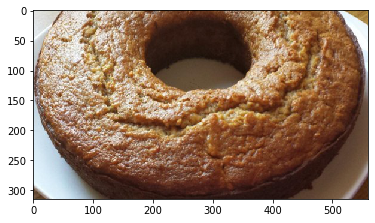

<Figure size 432x288 with 0 Axes>

In [160]:
Pics(7500)

grandmas fresh apple cake
 
 Stats 

grandmas fresh apple cake
Prep_time             25 Minutes
Cook_time                1 Hour 
Calorie             213 calories
Rating          4.46835422515869
Review_count                 131
Name: 7500, dtype: object 

******************************************************************************************

 Ingredients 

grandmas fresh apple cake
{1: '1 cup all-purpose flour', 2: '1 teaspoon baking soda', 3: '1 teaspoon ground cinnamon', 4: '1/2 teaspoon salt', 5: '1 cup white sugar', 6: '1 egg', 7: '1/4 cup vegetable oil', 8: '2 cups peeled and chopped apple', 9: '1/2 cup chopped walnuts', 10: '1/2 cup raisins'} 

******************************************************************************************

 Directions 

grandmas fresh apple cake
{1: 'Preheat oven to 350 degrees F (175 degrees C)', 2: 'Grease and flour a fluted tube pan (such as Bundt(R))', 3: ', Sift flour, baking soda, cinnamon, and salt together in a bowl', 4: 'Set aside', 5: ',

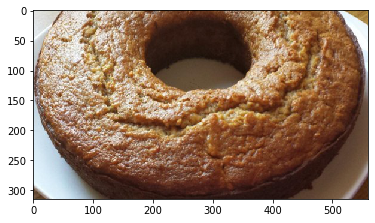

<Figure size 432x288 with 0 Axes>

In [161]:
All_info(7500)

# Analayzing Ingredients


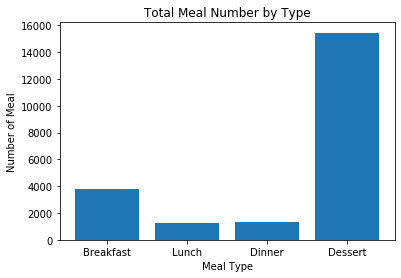

In [49]:
p2 = plt.bar(x, urls_num)
plt.xlabel('Meal Type')
plt.ylabel('Number of Meal')
plt.title('Total Meal Number by Type')
# plt.xticks( rotations = 45)
plt.show()


In [134]:
from wordcloud import WordCloud #, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



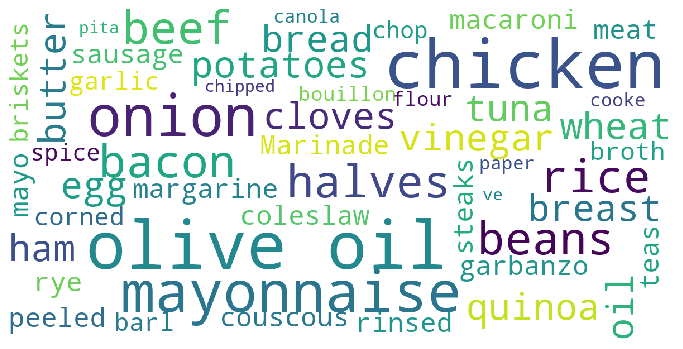

In [36]:
show_wordcloud(df[df['Meal_Type']=='lunch']['Ingredients'])

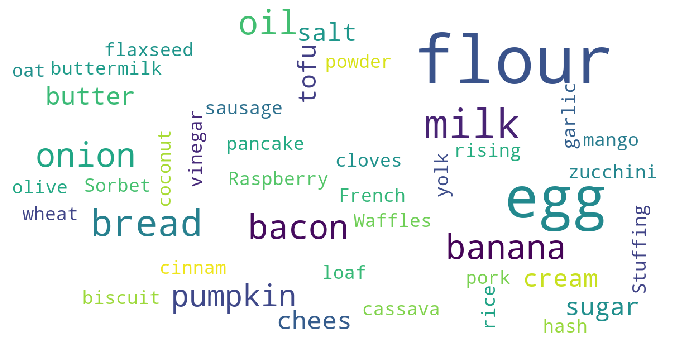

In [39]:
show_wordcloud(df[df['Meal_Type']=='breakfast']['Ingredients'])

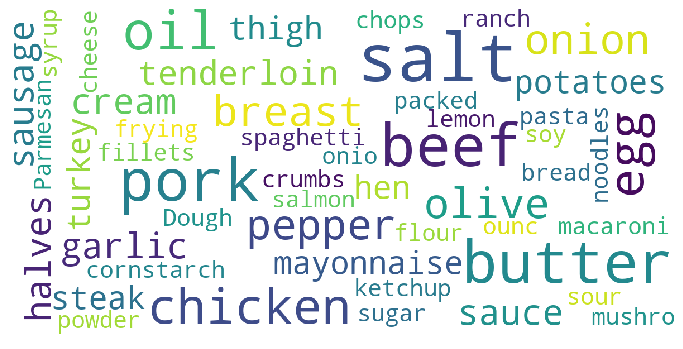

In [40]:
show_wordcloud(df[df['Meal_Type']=='dinner']['Ingredients'])

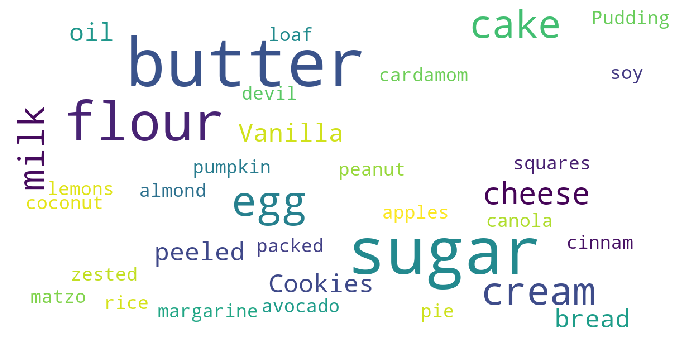

In [135]:
show_wordcloud(df[df['Meal_Type']=='dessert']['Ingredients'])

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

In [15]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      max_iter=20,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=20,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [16]:
lda_output = lda_model.fit_transform(tfidf_matrix)


In [18]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(tfidf_matrix))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(tfidf_matrix))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -312994.07418821263
Perplexity:  251.07603959416295
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 20, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [19]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['milk', 'buttermilk', 'powder', 'raisin', 'pie', 'ginger', 'butter', 'pumpkin', 'soda', 'salt', 'egg', 'flour', 'nutmeg', 'sugar', 'cinnamon']


THE TOP 15 WORDS FOR TOPIC #1
['coconut', 'cocoa', 'cake', 'soda', 'chop', 'salt', 'milk', 'powder', 'cream', 'chocolate', 'flour', 'egg', 'vanilla', 'butter', 'sugar']


THE TOP 15 WORDS FOR TOPIC #2
['almond', 'cereal', 'lime', 'peach', 'jell', 'milk', 'orange', 'yogurt', 'lemon', 'banana', 'pit', 'rice', 'honey', 'strawberry', 'peanut']


THE TOP 15 WORDS FOR TOPIC #3
['bacon', 'egg', 'tomato', 'chicken', 'cheddar', 'mince', 'sauce', 'olive', 'garlic', 'oil', 'salt', 'onion', 'cheese', 'chop', 'pepper']




In [21]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tfidf_matrix, tfidf, mds='tsne')
panel

//anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      225.430695  164.490646       1        1  40.317310
3      221.296631 -543.766174       2        1  24.807230
0     -130.740097 -187.570908       3        1  18.492746
2      577.467224 -191.704651       4        1  16.382715, topic_info=     Category         Freq        Term        Total  loglift  logprob
205   Default   973.000000    cinnamon   973.000000  30.0000  30.0000
719   Default   729.000000      pepper   729.000000  29.0000  29.0000
705   Default   559.000000      peanut   559.000000  28.0000  28.0000
192   Default  1018.000000   chocolate  1018.000000  27.0000  27.0000
929   Default  2375.000000       sugar  2375.000000  26.0000  26.0000
659   Default   516.000000      nutmeg   516.000000  25.0000  25.0000
920   Default   437.000000  strawberry   437.000000  24.0000  24.0000
363   Default  1575.000000       flour  1575.000000  23.0000  23.0000
465   Default   348.000000       honey   348.000000  22.0000  22.0000
885   Default   840.000000        soda   840.000000  21.0000  21.0000
782   Default   344.000000     pumpkin   344.000000  20.0000  20.0000
671   Default   415.000000       onion   415.000000  19.0000  19.0000
398   Default   312.000000      ginger   312.000000  18.0000  18.0000
176   Default   808.000000      cheese   808.000000  17.0000  17.0000
809   Default   264.000000        rice   264.000000  16.0000  16.0000
747   Default   261.000000         pit   261.000000  15.0000  15.0000
992   Default  1452.000000     vanilla  1452.000000  14.0000  14.0000
788   Default   352.000000      raisin   352.000000  13.0000  13.0000
320   Default  1620.000000         egg  1620.000000  12.0000  12.0000
389   Default   310.000000      garlic   310.000000  11.0000  11.0000
49    Default   335.000000      banana   335.000000  10.0000  10.0000
125   Default   251.000000  buttermilk   251.000000   9.0000   9.0000
734   Default   541.000000         pie   541.000000   8.0000   8.0000
668   Default   289.000000       olive   289.000000   7.0000   7.0000
845   Default   289.000000       sauce   289.000000   6.0000   6.0000
673   Default   409.000000      orange   409.000000   5.0000   5.0000
134   Default   431.000000        cake   431.000000   4.0000   4.0000
1025  Default   210.000000      yogurt   210.000000   3.0000   3.0000
213   Default   397.000000       clove   397.000000   2.0000   2.0000
612   Default   260.000000       mince   260.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
79     Topic4    98.231625  blackberry    99.024236   1.8009  -4.5482
615    Topic4    87.316956        mint    88.111334   1.7999  -4.6660
864    Topic4    87.274658      sesame    88.078011   1.7998  -4.6665
357    Topic4    83.324494        flax    84.113040   1.7995  -4.7128
565    Topic4    81.779660       mango    82.566477   1.7994  -4.7315
68     Topic4    69.697685       berry    70.487593   1.7977  -4.8914
183    Topic4    68.576479        chia    69.359072   1.7976  -4.9076
156    Topic4    69.128064      cashew    69.921940   1.7975  -4.8996
417    Topic4    65.906652       grape    66.715791   1.7967  -4.9473
953    Topic4    60.414885         tea    61.204068   1.7960  -5.0343
390    Topic4    78.262590     garnish    79.415652   1.7943  -4.7755
646    Topic4    49.046805      nectar    49.826652   1.7932  -5.2428
564    Topic4    47.073361    mandarin    47.856349   1.7924  -5.2839
5      Topic4    46.367447       agave    47.148317   1.7922  -5.2990
935    Topic4    43.301517     sunflow    44.097252   1.7907  -5.3674
221    Topic4    40.819660    cocktail    41.610892   1.7897  -5.4264
535    Topic4   173.953354        lime   200.272331   1.6681  -3.9768
49     Topic4   239.493038      banana   335.390728   1.4722  -3.6571
82     Topic4   154.334232   blueberry   229.474897   1.4123  -4.0965
673    Topic4   206.932806      orange 

In [43]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [2,3,4 ,5],'learning_decay': [.5, .7]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=25)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, cv=3, verbose=2, n_jobs = -1)

# Do the Grid Search
model.fit(tfidf_matrix)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  4.5min remaining:   24.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=25,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                        

In [44]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 2}
Best Log Likelihood Score:  -115113.58481777023
Model Perplexity:  198.04389239282375


In [141]:
list(df.columns)

['Name',
 'Ingredients',
 'Directions',
 'Prep_time',
 'Cook_time',
 'Calorie',
 'Rating',
 'Review_count',
 'img_urls',
 'Ingredients_list',
 'Directions_list',
 'Meal_Type']